# Predict Cancer Levels


### Importing The Libraries

In [ ]:
# ! pip install mlxtend

In [2]:
%pip install mlxtend --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.1 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [103]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.frequent_patterns import association_rules
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import ConfusionMatrixDisplay

sns.set()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Loading The Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/drive


In [5]:
%cd drive/MyDrive/data_mining_final
%ls

/content/drive/MyDrive/data_mining_final
 box_plot_all_datas_after_drop.png  'datamining_final (2).ipynb'
 box_plot_all_datas_befor_drop.png   datamining_final.ipynb
 cancer.xlsx                         histogram_data_distribution.png
'datamining_final (1).ipynb'         level_distribution_age.png


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
data = pd.read_excel('cancer.xlsx')
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


### EDA

In [7]:
data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1000, 25)

In [8]:
cols = data.keys()
cols

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
data.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [11]:
data['Level'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


High      365
Medium    332
Low       303
Name: Level, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


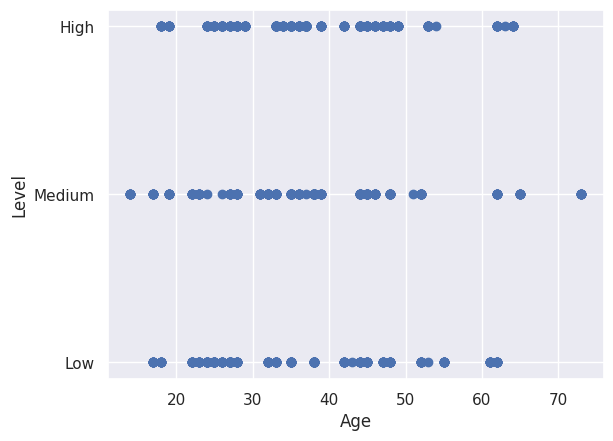

In [12]:
fig , ax = plt.subplots()
ax.scatter(  data['Age'],data['Level'])
ax.set_xlabel("Age")
ax.set_ylabel("Level")
sns.set_palette('rocket')
plt.savefig('level_distribution_age.png')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='Level', ylabel='count'>

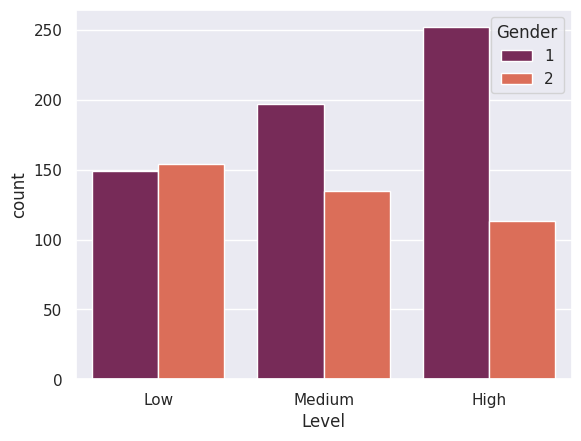

In [13]:
sns.countplot(data=data, x="Level", hue="Gender", palette= 'rocket')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


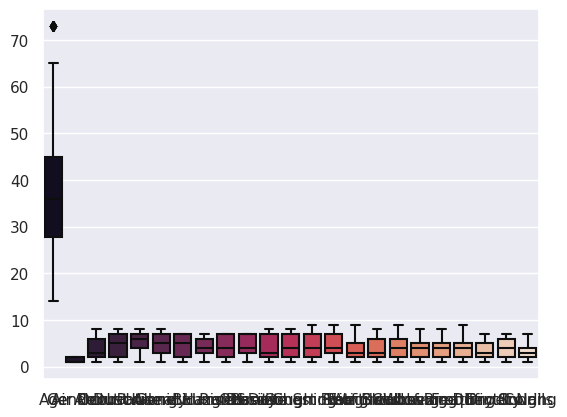

In [14]:
# plt.subplots(figsize=(20, 8))
plt.subplots()
sns.boxplot(data, palette= 'rocket')
plt.savefig('box_plot_all_datas_befor_drop.png')

## Capturing the outlier using IQR for Age

In [15]:
X=data.Age
Q1=np.quantile(X, .25)
Q3=np.quantile(X, .75)
IQR=Q3-Q1
Lb=Q1-(1.5*IQR)
Ub=Q3+(1.5*IQR)
Outliers=[]
for i in X:
    if (i<Lb or i> Ub):
        Outliers.append(i)

print("----------Outliers in variable 'Age' for the given dataset----------")
print(Outliers)

----------Outliers in variable 'Age' for the given dataset----------
[73, 73, 73, 73, 73, 73, 73, 73, 73, 73]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Removing the outliers for Age

In [16]:
for ele in Outliers:
    data.drop(data[(data['Age']==ele)].index, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


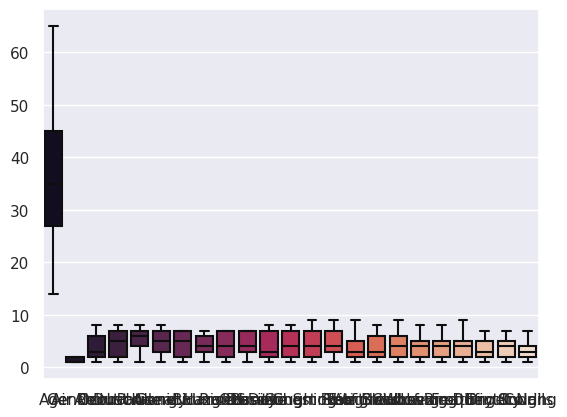

In [17]:
plt.subplots()
sns.boxplot(data, palette= 'rocket')
plt.savefig('box_plot_all_datas_after_drop.png')

## Plotting histogram to check the data distribution

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


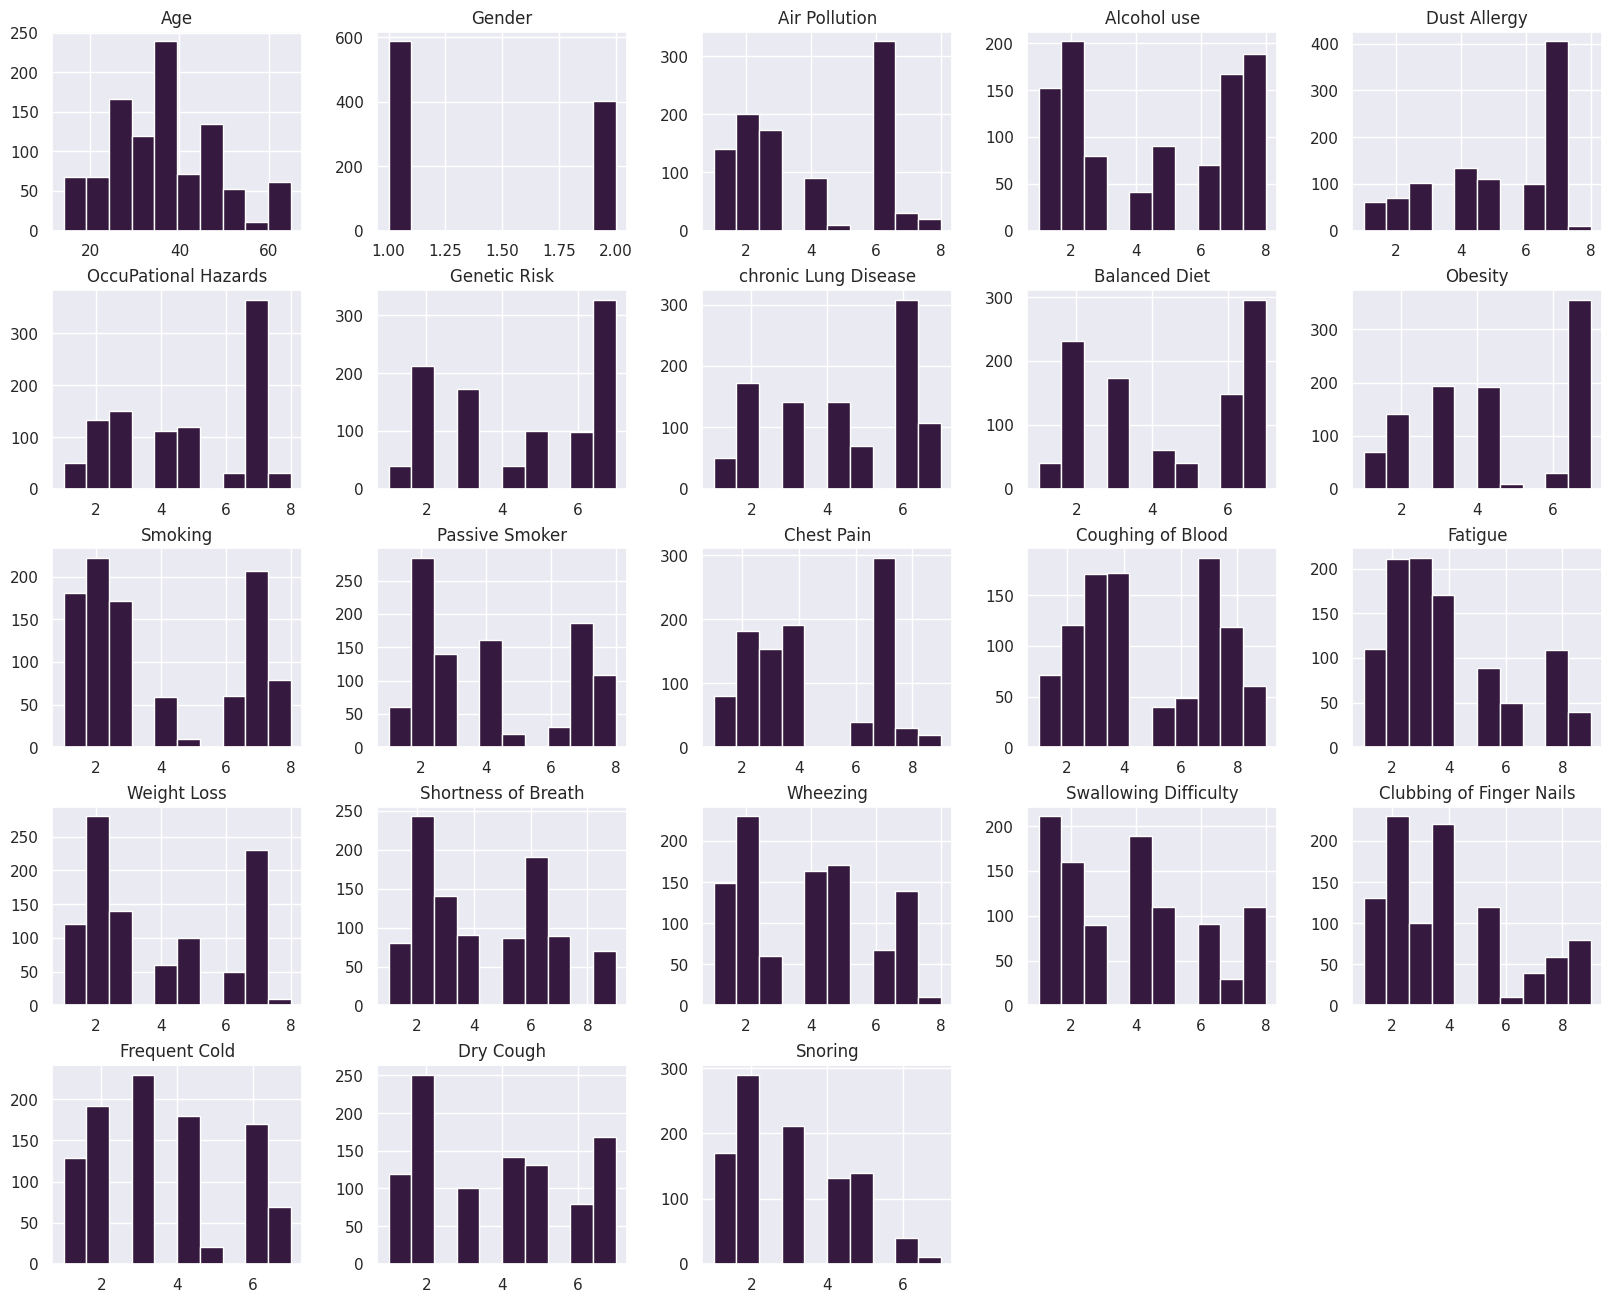

In [18]:
data.hist(figsize=(20,16), bins=10)
plt.savefig('histogram_data_distribution.png')
plt.show()

### Data Cleaning

In [19]:
data.isnull().value_counts().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


990

There is no null values

# Frequent Patterns
### Data Transformation

In [20]:
df = data.drop('Patient Id', axis=1)

# Mapping for age categories
age_categories = {
    'Child': (0, 12),
    'Teen': (13, 19),
    'Adult': (20, 59),
    'Old': (60, float('inf'))
}

# Mapping for gender
gender_mapping = {
    1: 'Male',
    2: 'Female'
}

# Function to categorize age
def categorize_age(age):
    for category, (min_age, max_age) in age_categories.items():
        if min_age <= age <= max_age:
            return category
    return 'unknown'

# Generate itemsets
itemsets = []
for _, row in df.iterrows():
    # if row['Level'] != "High":
    #     continue

    itemset = []
    itemset.append(gender_mapping[row['Gender']])  # Add gender name

    age_category = categorize_age(row['Age'])
    itemset.append(age_category)  # Add age category

    itemset.append(row['Level'])  # Add cancer threat level

    for column in df.columns[3:-1]:
        if 0 <= row[column] <= 3:
            itemset.append(column + "-low")
        if 4 <= row[column] <= 5:
            itemset.append(column + "-medium")
        if 7 <= row[column] <= 10:
            itemset.append(column + "-high")

    itemsets.append(itemset)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Frequent Pattern Mining

In [21]:
te = TransactionEncoder()
te_ary = te.fit(itemsets).transform(itemsets)
df = pd.DataFrame(te_ary, columns=te.columns_)
value_counts = data['Level'].value_counts()
print(value_counts)

scaler = 0.75
_min_support = 365 / 990 * scaler
print("scaler", scaler)
print(_min_support)
frequent_itemsets = fpgrowth(df, min_support=_min_support, use_colnames=True)
frequent_itemsets

High      365
Medium    322
Low       303
Name: Level, dtype: int64
scaler 0.75
0.2765151515151515


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.870707,(Adult)
1,0.593939,(Male)
2,0.580808,(Smoking-low)
3,0.556566,(Frequent Cold-low)
4,0.538384,(Fatigue-low)
...,...,...
340,0.311111,"(Female, Snoring-low)"
341,0.280808,"(Female, Adult, Snoring-low)"
342,0.307071,"(Smoking-low, Wheezing-medium)"
343,0.307071,"(Wheezing-medium, Adult)"


# rules

In [22]:
all_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules = all_rules[all_rules['consequents'].apply(lambda x: len(x) == 1 and "High" in x)]
print("number of rules", len(rules))
rules


number of rules 35


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
394,(Coughing of Blood-high),(High),0.369697,0.368687,0.329293,0.890710,2.415899,0.192991,5.776515,0.929831
400,"(Adult, Coughing of Blood-high)",(High),0.330303,0.368687,0.289899,0.877676,2.380545,0.168121,5.160985,0.865956
404,"(OccuPational Hazards-high, Dust Allergy-high)",(High),0.388889,0.368687,0.277778,0.714286,1.937378,0.134400,2.209596,0.791736
410,(Obesity-high),(High),0.359596,0.368687,0.329293,0.915730,2.483762,0.196715,7.491582,0.932825
416,"(Obesity-high, Coughing of Blood-high)",(High),0.359596,0.368687,0.329293,0.915730,2.483762,0.196715,7.491582,0.932825
428,"(Adult, Obesity-high)",(High),0.320202,0.368687,0.289899,0.905363,2.455642,0.171845,6.670875,0.871986
434,"(Coughing of Blood-high, Adult, Obesity-high)",(High),0.320202,0.368687,0.289899,0.905363,2.455642,0.171845,6.670875,0.871986
494,(Alcohol use-high),(High),0.358586,0.368687,0.277778,0.774648,2.101100,0.145572,2.801452,0.817037
526,"(Alcohol use-high, Dust Allergy-high)",(High),0.358586,0.368687,0.277778,0.774648,2.101100,0.145572,2.801452,0.817037
530,"(Alcohol use-high, OccuPational Hazards-high)",(High),0.358586,0.368687,0.277778,0.774648,2.101100,0.145572,2.801452,0.817037


# Classification
### Encoding


In [23]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['Level']= encoder.fit_transform(data['Level'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Features Selection

In [24]:
data.drop(['Patient Id'],axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


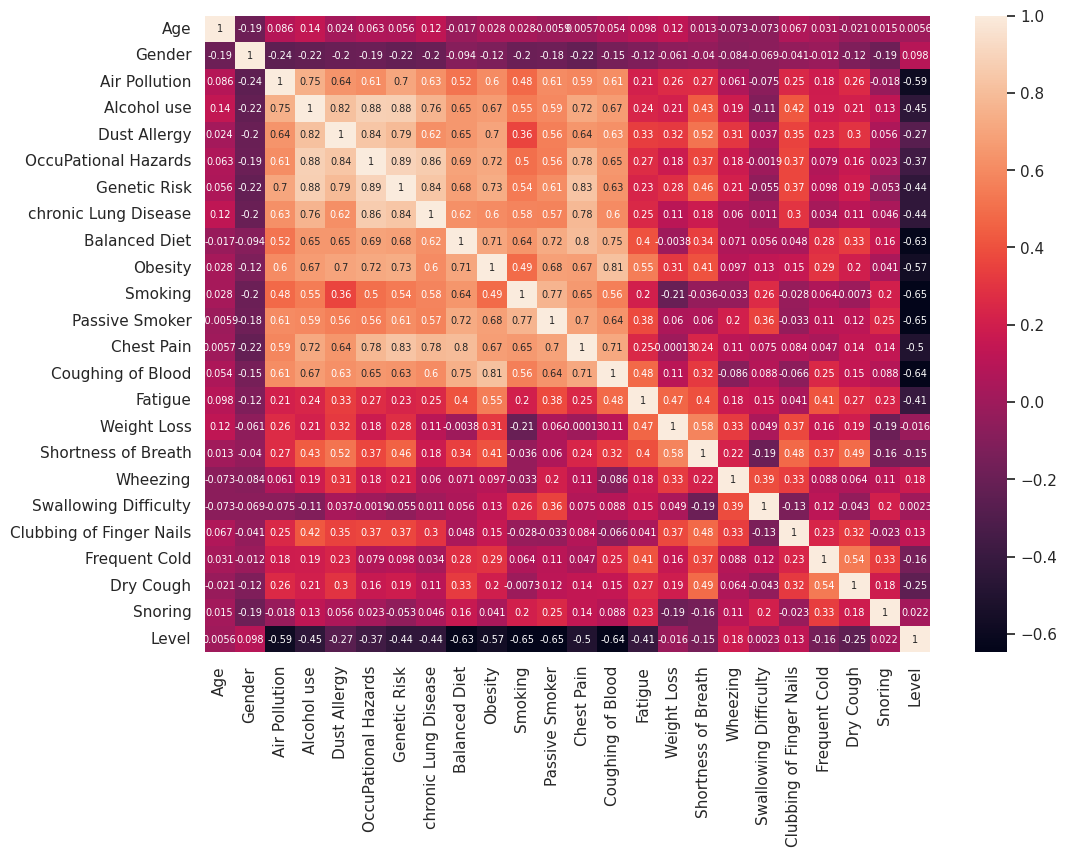

In [25]:
correlation = data.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(correlation,annot=True,cmap="rocket", annot_kws={"size":7})
plt.show()

### Splitting The Data

In [26]:
from sklearn.model_selection import train_test_split

X = data.iloc[: , :-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 , random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(693, 23) (297, 23) (693,) (297,)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
X_train_scaled=Scaler.fit_transform(X_train) #Scaling and fitting the training set to a model
X_test_scaled=Scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Train The classification Model

In [28]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()

classifier.fit(X_train_scaled,y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KNeighborsClassifier()

### Classification Accuracy

In [29]:

ypred = classifier.predict(X_test_scaled)


result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy: ",result2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Confusion Matrix:
[[121   0   0]
 [  0  90   0]
 [  0   0  86]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00        90
           2       1.00      1.00      1.00        86

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297

Accuracy:  1.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


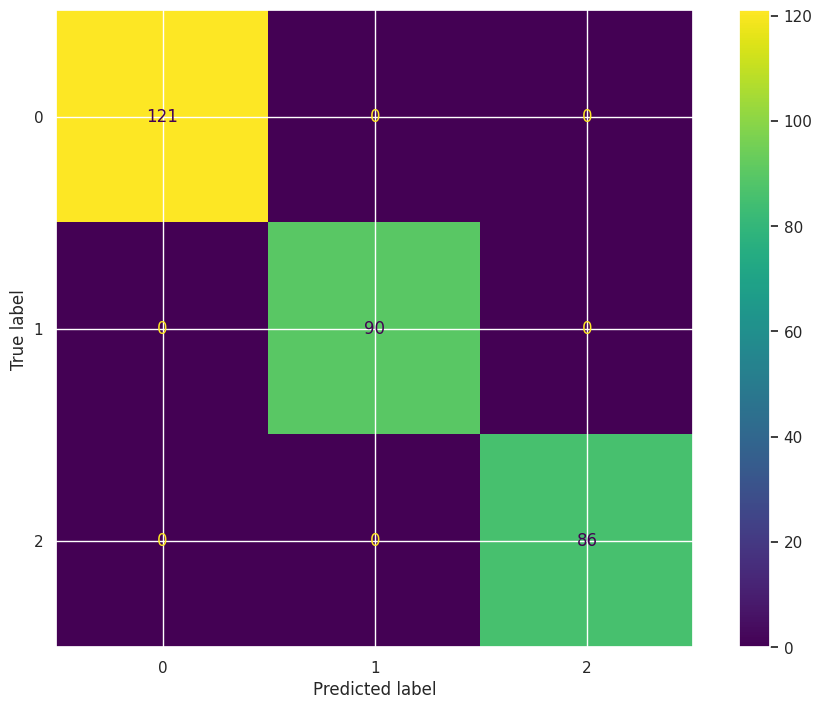

In [30]:

cm = confusion_matrix(y_test, ypred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_ )
disp.plot()

# using K-fold cross validtion

In [33]:
clf = KNeighborsClassifier()
scores = cross_val_score(clf, X, y, cv=4)
scores

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0.99596774, 1.        , 1.        , 0.99595142])

In [34]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

1.00 accuracy with a standard deviation of 0.00


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# clustering Accuracy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


best result :  0.96633  with k :  10


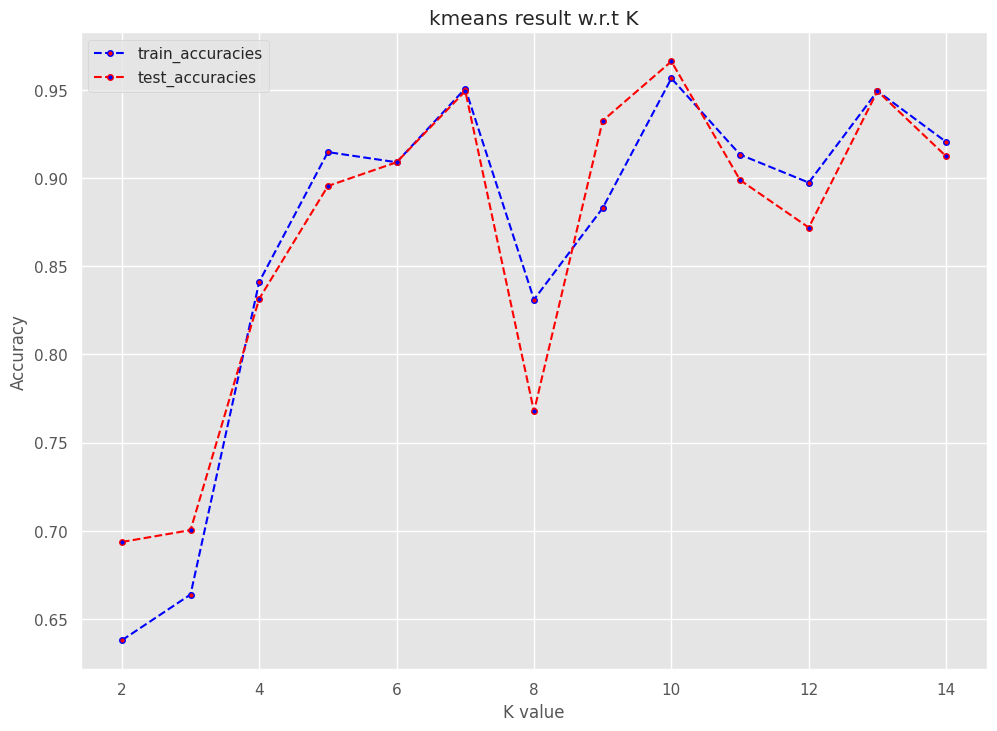

In [101]:
test_accuracies=[]
train_accuracies=[]
n = 15
max_acc_test = 0
max_k = 0
ypred = y_test

for k in range(2, n):

  # k =  Number of clusters
  kmeans = KMeans(n_clusters=k, random_state=11)
  kmeans.fit(X_train_scaled)


  y_train2 = y_train.to_numpy()


  cluster_labels = {}
  for i in range(k):
      cluster_instances = np.where(kmeans.labels_ == i)[0]  # Indices of instances in the cluster
      cluster_instance_labels = y_train2[cluster_instances]  # Labels of instances in the cluster
      cluster_label = np.argmax(np.bincount(cluster_instance_labels))  # Most frequent label
      cluster_labels[i] = cluster_label


  y_pred_train = []
  for test_instance in X_train_scaled:
      closest_cluster = kmeans.predict([test_instance])[0]
      predicted_label = cluster_labels[closest_cluster]
      y_pred_train.append(predicted_label)


  y_pred_train = np.array(y_pred_train)
  result1 = accuracy_score(y_train,y_pred_train)
  train_accuracies.append(result1)


  y_pred_test = []
  for test_instance in X_test_scaled:
      closest_cluster = kmeans.predict([test_instance])[0]
      predicted_label = cluster_labels[closest_cluster]
      y_pred_test.append(predicted_label)


  y_pred_test = np.array(y_pred_test)
  result2 = accuracy_score(y_test,y_pred_test)
  # print("k:", k, "Accuracy test: ",result2, "    Accuracy train: ",result1)
  test_accuracies.append(result2)
  if max_acc_test < result2:
    max_acc_test = result2
    max_k = k
    ypred = y_pred_test

print("best result : ", round(max_acc_test, 5) , " with k : ", max_k)
plt.title("kmeans result w.r.t K")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.style.use('ggplot')

k_list = np.arange(2, n)

plt.plot(k_list, train_accuracies, color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=4, label='train_accuracies')
plt.plot(k_list, test_accuracies, color='red', linestyle='dashed',
         marker='o',markerfacecolor='blue', markersize=4, label='test_accuracies')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


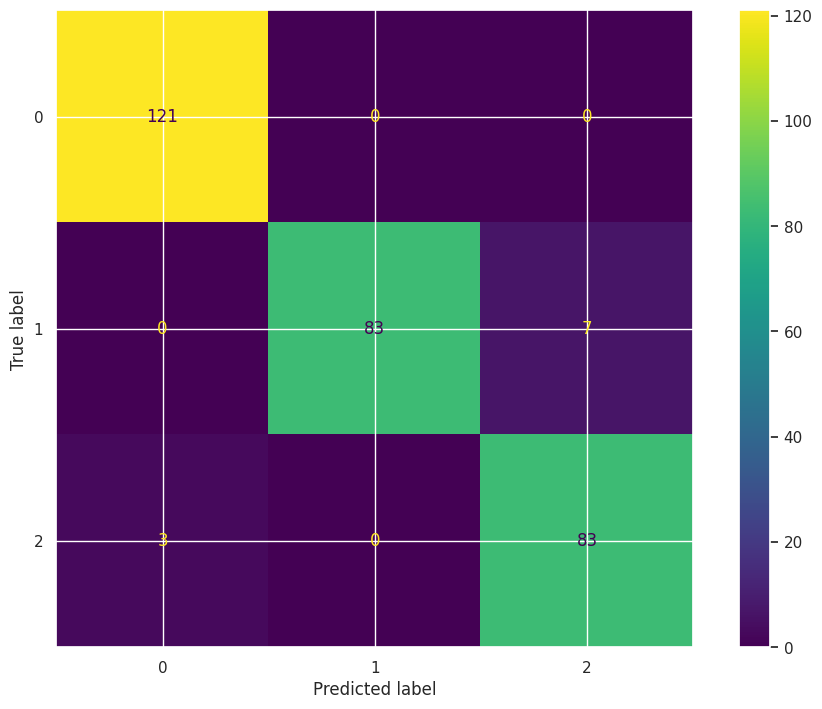

In [105]:

cm = confusion_matrix(y_test, ypred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_ )
disp.plot()